In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import fft 

In [2]:
def wavenum(i, N) : return (i + N // 2) % N - N // 2

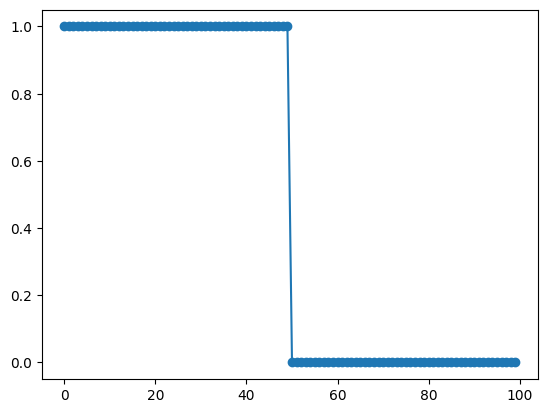

In [3]:
n = 100
x_o = np.arange(n)
xn = n * 0.5
x = x_o < xn
x = np.array(x)
plt.plot(x_o,x, marker ='o')

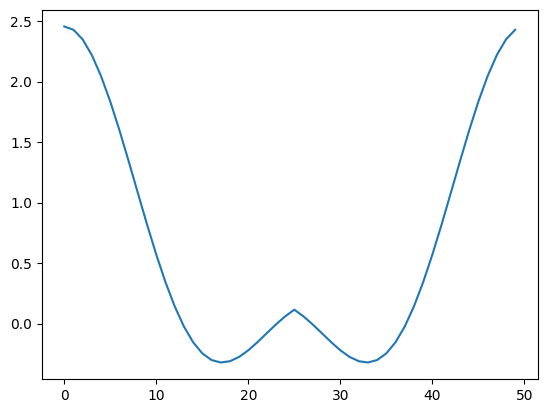

In [4]:
# Create filter.
delta = 10.3
filter_size = 50

M = 3/2
H = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    if i != 0:
        k = wavenum(i,filter_size)
        a = 2 * np.pi / filter_size * k * M  
        H[i] = (np.sin(3*a/2))/a - (3 * np.pi * np.cos(3 * a/2))/(9 * a**2 - np.pi**2)
        
    # Hopital rule for w=0.
    else:
        H[i] = 3/2 + 3/np.pi

plt.plot(np.arange(filter_size), H.real)

<StemContainer object of 3 artists>

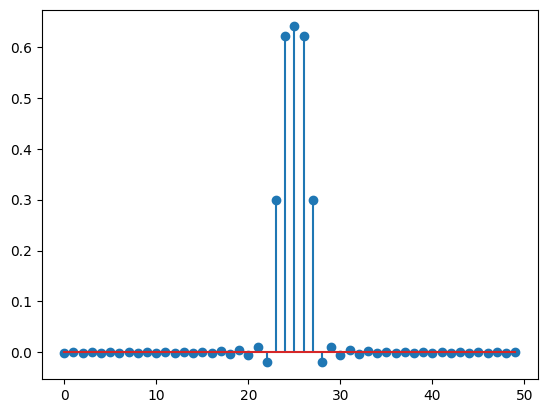

In [5]:
# Inverse Fourier Transform of the filter, fftshifted.
h = np.fft.ifft(H)
plt.stem(np.arange(filter_size), np.fft.fftshift(h).real)

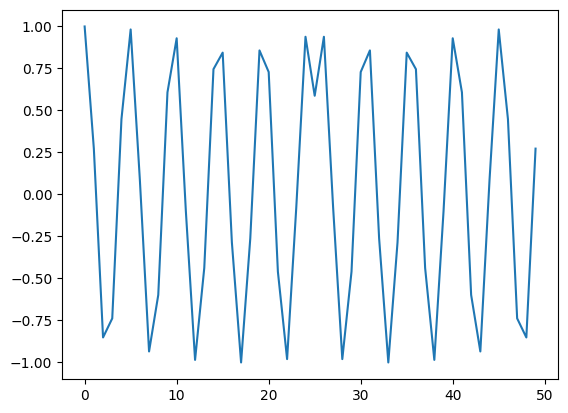

In [6]:
#Shift phase. Based on size of filter since it is that which we are shifting now.
L = np.zeros(filter_size, dtype=complex)
for i in range(filter_size):
    L[i] = np.exp(2j * np.pi * delta * wavenum(i,filter_size) /filter_size)
plt.plot(np.arange(filter_size), L.real)

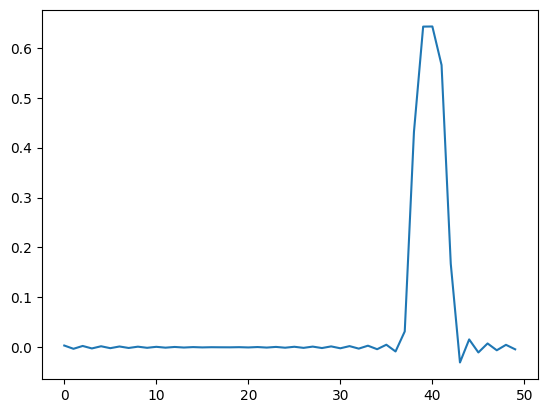

In [7]:
# Multiply filter by phase shift and do Inverse Fourier Transform.
z = np.fft.ifft(L * H)
plt.plot(np.arange(filter_size),z.real)

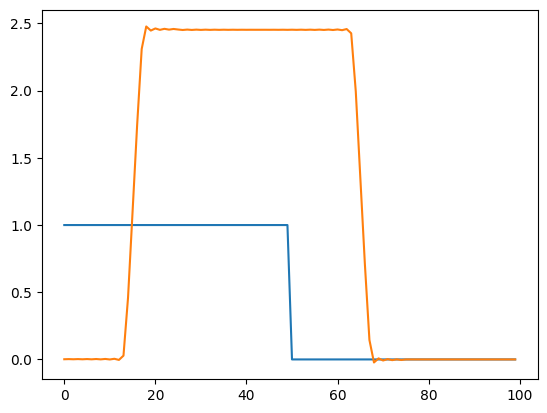

In [8]:
# Apply filter to each point of x.
x_shifted_filter = np.zeros(n, dtype=complex)
x_shifted_filter = np.convolve(x,z, 'same')
plt.plot(x_o,x)
plt.plot(x_o,x_shifted_filter.real)

In [9]:
# Now shift by the integer part.
